# Active Learning Experiment Script

Store the demonstration query data in `./Data` folder. Set the path to the data and output folders from `params.py`.

In [7]:
from DemoScript import *
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20,10]

First read the raw data and store only the points where proposition changes were observed

In [2]:
raw_data = read_raw_data(params.raw_data_path)
compressed_data = compress_data(raw_data)
write_data(params.compressed_data_path, compressed_data)

Compute the batch posterior using the demonstrated trajectories

In [3]:
params.nTraj = 2
infer_command = f'webppl batch_bsi.js --require webppl-json --require webppl-fs -- --nSamples {params.nSamples}  --nBurn {params.nBurn} --dataPath \'{params.compressed_data_path}\' --outPath \'{params.output_path}\' --nTraj {params.nTraj}'
returnval = os.system(infer_command)
if returnval: Exception('Inference Failure')

Compile a PUnS MDP and train a policy for the MDP with Q-learning

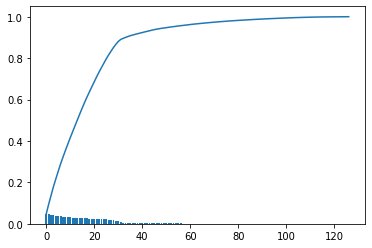

In [4]:
spec_file = os.path.join(params.output_path, 'batch_posterior.json')
MDP = CreateSpecMDP(spec_file, n_threats=0, n_waypoints=5)

In [5]:
QAgent = QLearningAgent(MDP)
QAgent.explore(episode_limit = 10000, action_limit = 100000, verbose = True)

Training episode 7931         

(100000, 7931)

Evaluate on 200 trajectories generated by following a softmax exploration policy

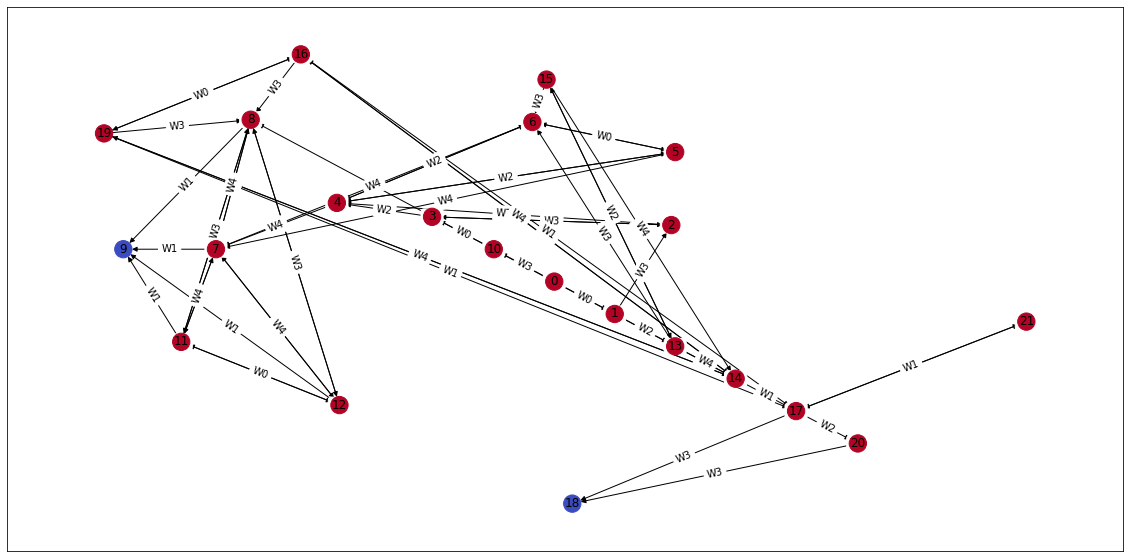

In [9]:
eval_agent = ExplorerAgent(MDP, input_policy=QAgent.create_learned_softmax_policy(0.05))
eval_agent.explore(episode_limit = 200)
col = eval_agent.visualize_exploration(prog='twopi')

Determine what the terminal state rewards are and plot the terminal state rewards in ascending order

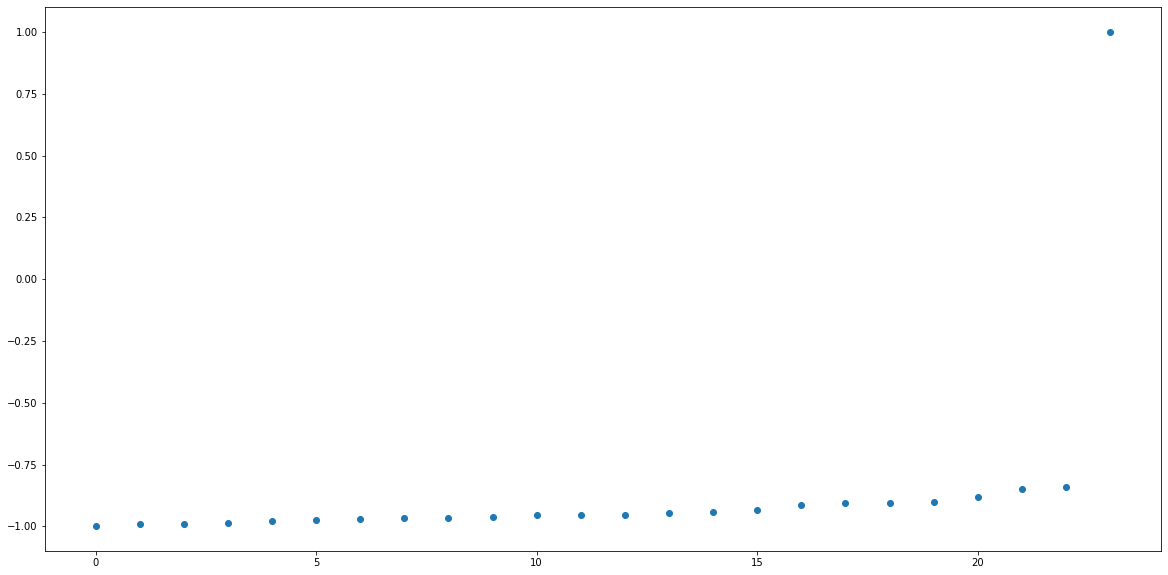

In [10]:
specification_fsm = MDP.specification_fsm
rewards = [specification_fsm.reward_function(state) for state in specification_fsm.terminal_states]
plt.plot(np.sort(rewards),'o')

In [11]:
rewards = [specification_fsm.reward_function(state, force_terminal=True) for state in specification_fsm.states2id.keys()]

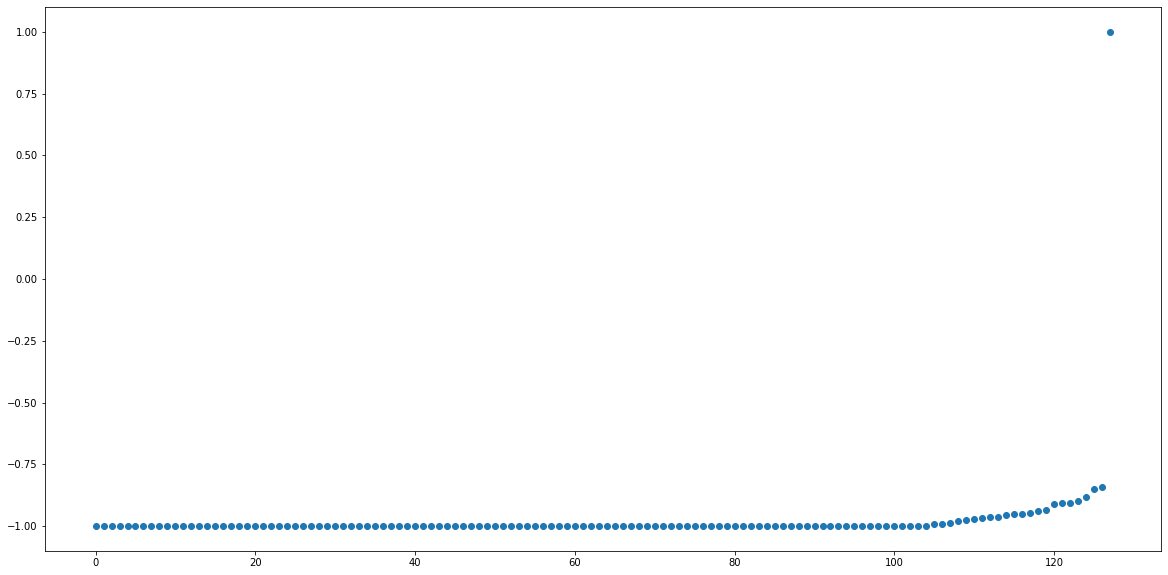

In [12]:
plt.plot(np.sort(rewards),'o')

In [24]:
desired_state, breadcrumb = identify_desired_state(MDP.specification_fsm)
spec_fsm_recompiled = recompile_reward_function(MDP.specification_fsm, desired_state, breadcrumb)

# recompile the specification MDP with the new state machine

MDP2 = SpecificationMDP(spec_fsm_recompiled, MDP.control_mdp)
qAgent2 = QLearningAgent(MDP2)
qAgent2.explore(action_limit = 100000, episode_limit = 5000, verbose = True)

Training episode 4999         

(43945, 5000)

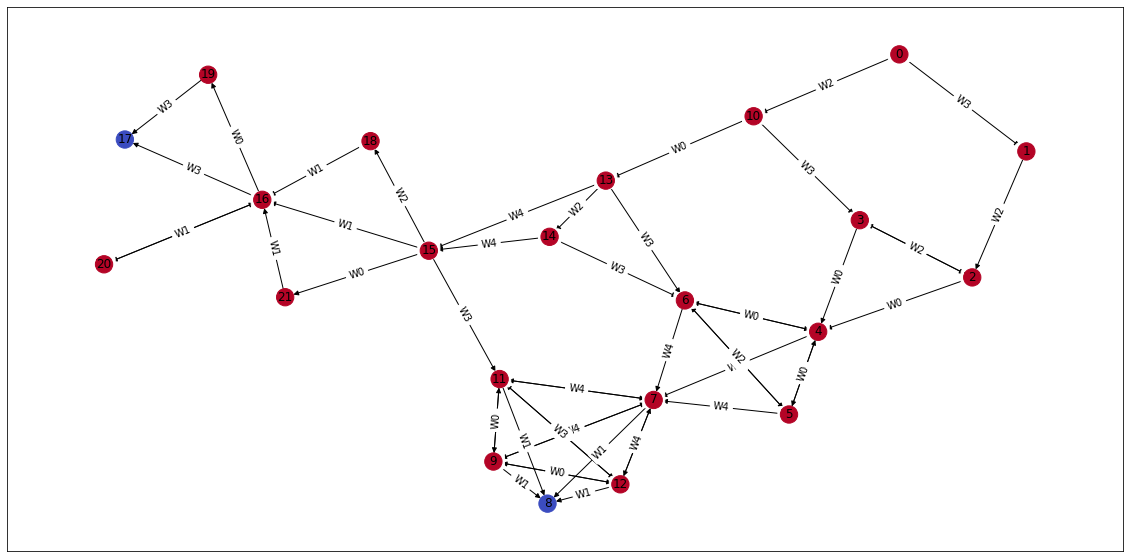

In [33]:
eval_agent2 = ExplorerAgent(MDP2, input_policy=qAgent2.create_learned_softmax_policy(0.1))
eval_agent2.explore(episode_limit =100)
col = eval_agent2.visualize_exploration(prog='neato')

In [31]:
eval_agent2.easy_episodic_record

[[('0', 'W2', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '4', 0),
  ('4', 'W1', '5', 1)],
 [('0', 'W2', '0', 0),
  ('0', 'W2', '1', 0),
  ('1', 'W3', '1', 0),
  ('1', 'W3', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '4', 0),
  ('4', 'W1', '5', 1)],
 [('0', 'W2', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '3', 0),
  ('3', 'W4', '4', 0),
  ('4', 'W1', '5', 1)],
 [('0', 'W2', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '3', 0),
  ('3', 'W4', '4', 0),
  ('4', 'W1', '5', 1)],
 [('0', 'W2', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '4', 0),
  ('4', 'W1', '4', 0),
  ('4', 'W1', '5', 1)],
 [('0', 'W2', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '3', 0),
  ('3', 'W4', '4', 0),
  ('4', 'W1', '4', 0),
  ('4', 'W1', '5', 1)],
 [('0', 'W2', '1', 0),
  ('1', 'W3', '1', 0),
  ('1', 'W3', '2', 0),
  ('2', 'W0', '3', 0),
  ('3', 'W4', '4', 0),
  ('4